In [1]:
import numpy as np
import math 
import matplotlib.pyplot as plt

In [2]:
def exact_function(no_of_points):
    X = np.linspace(0., 5., no_of_points).reshape((no_of_points,1))
    y = 2*np.cos(X).reshape((no_of_points,1))
    return X,y

In [3]:
def sample_points(no_of_points):
    X = np.linspace(0., 5., no_of_points).reshape((no_of_points,1))
    y = 2*np.cos(X) + (np.random.random_sample((no_of_points,1))/2)
    return X,y

## VISUALISING

Plotting the sample points and the true function. Sample points are the values of true function with noise. 

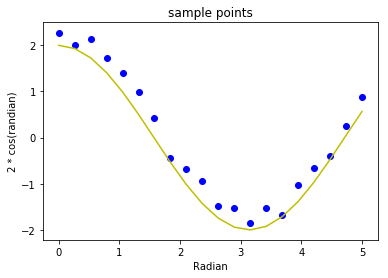

In [4]:
no_of_points = 20
X_sample, y_sample = sample_points(no_of_points)
X_truefn, y_truefn = exact_function(no_of_points)
plt.scatter(X_sample, y_sample, color = 'blue')
plt.xlabel('Radian')
plt.ylabel('2 * cos(randian)')
plt.title('sample points')
plt.plot(X_truefn, y_truefn, 'y-')
plt.show()

## BUILDING MODEL

Using multivariate linear regression model, we will try to understand the tradeoff between bias and variance.
* The bias is an error from erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting).


* The variance is an error from sensitivity to small fluctuations in the training set. High variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs (overfitting).

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures as PF

def fit_datasets(deg, X, y) :
    X.reshape(-1,1)
    y.reshape(-1,1)
    poly = PF(degree = deg)
    X = poly.fit_transform(X)
    poly.fit(X,y)
    return X, y

def create_model(X, y) :
    model = LinearRegression()
    model.fit(X, y)
    return model

In [11]:
from numpy.linalg import norm

no_of_points = 10
max_degree = 10
no_of_models = 20 # no. of models per degree
X_train, y_train = sample_points(no_of_points)
bias = []
variance = []
error = []

for degree in range(max_degree) :
    models = []
    m_var = 0
    avg_pred_y = np.zeros(y_train.shape)
    
    for _ in range(no_of_models):
        X, y = sample_points(no_of_points)
        X, y = fit_datasets(degree, X, y)
        model = create_model(X, y)
        pred_y = model.predict(X)
        avg_pred_y = avg_pred_y + pred_y
        models.append(pred_y)
    
    avg_pred_y = avg_pred_y/no_of_models
    m_bias = norm(avg_pred_y - y_train)/no_of_points
    
    for pred_y in models:
        m_var += (norm(avg_pred_y - pred_y)/no_of_points)
    m_var = m_var/no_of_models
    
    bias.append(m_bias)
    variance.append(m_var)
    error.append(m_bias + m_var)

## VISUALISING THE TRADEOFF BETWEEN BIAS AND VARIANCE

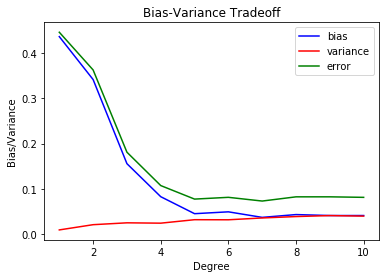

In [12]:
x_deg = []
for deg in range(1, max_degree+1):
    x_deg.append(deg)

plt.plot(x_deg, bias, color='blue', label = 'bias')
plt.plot(x_deg, variance, color='red', label = 'variance')
plt.plot(x_deg, error, color='green', label = 'error') 
plt.xlabel('Degree')
plt.ylabel('Bias/Variance')
plt.legend()
plt.title('Bias-Variance Tradeoff')
plt.show()

## INTERPRETING THE TRADEOFF

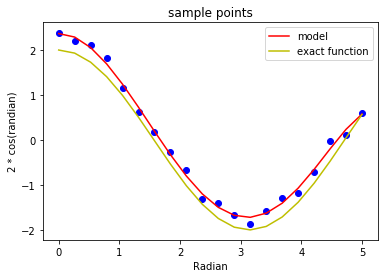

In [8]:
no_of_points = 20
X_sample, y_sample = sample_points(no_of_points)
X_truefn, y_truefn = exact_function(no_of_points)

degree = 5 #low bias, low variances
X, y = fit_datasets(degree, X_sample, y_sample)
model = create_model(X, y)
pred_y = model.predict(X)

plt.scatter(X_sample, y_sample, color = 'blue')
plt.plot(X_sample, pred_y, color = 'red', label = 'model')
plt.xlabel('Radian')
plt.ylabel('2 * cos(randian)')
plt.title('sample points')
plt.plot(X_truefn, y_truefn, 'y-', label = 'exact function')
plt.legend()
plt.show()